In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

class Visualizer:
    def __init__(self, particles):
        """
        Initializes the Visualizer with a list of Particle objects.
        
        Parameters:
        particles (list): A list of Particle objects to visualize.
        """
        self.particles = particles
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.sc = None

    def update(self, num):
        """
        Update function for the animation. Updates particle positions.
        
        Parameters:
        num (int): The current frame number.
        """
        positions = np.array([particle.position for particle in self.particles])
        
        # Clear the current plot
        self.ax.clear()
        
        # Set axis labels and limits
        self.ax.set_xlabel('X Position')
        self.ax.set_ylabel('Y Position')
        self.ax.set_zlabel('Z Position')
        self.ax.set_xlim(-100, 100)
        self.ax.set_ylim(-100, 100)
        self.ax.set_zlim(-100, 100)
        
        # Plot the particles
        colors = ["r" if particle.type == "proton" else "b" for particle in self.particles]
        self.sc = self.ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors)

    def animate(self):
        """
        Animate the particle movements in 3D.
        """
        ani = animation.FuncAnimation(self.fig, self.update, frames=100, interval=50, blit=False)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create some particles with random positions and velocities
    particles = [
        Particle(position=[np.random.uniform(-50, 50), np.random.uniform(-50, 50), np.random.uniform(-50, 50)],
                 velocity=[np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)],
                 mass=1.0, particle_type="proton")
        for _ in range(10)
    ]

    visualizer = Visualizer(particles)
    visualizer.animate()


NameError: name 'Particle' is not defined

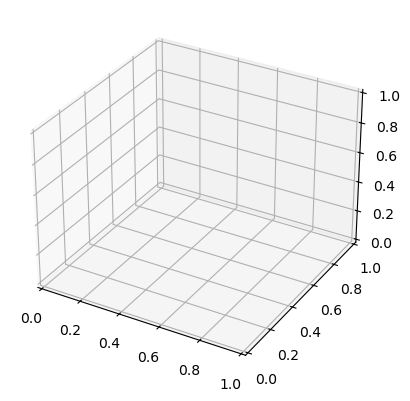

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

class Particle:
    def __init__(self, position, velocity, mass, particle_type):
        """
        Initializes a particle with position, velocity, mass, and type.
        """
        self.position = np.array(position, dtype=float)  # Position vector [x, y, z]
        self.velocity = np.array(velocity, dtype=float)  # Velocity vector [vx, vy, vz]
        self.mass = mass                                 # Mass of the particle
        self.type = particle_type                        # Particle type (e.g., "proton", "electron")
        self.energy = self.calculate_kinetic_energy()    # Initial energy calculated

    def update_position(self, dt):
        """
        Updates the particle’s position based on its velocity and a given time step dt.
        """
        self.position += self.velocity * dt

    def calculate_kinetic_energy(self):
        """
        Calculates the kinetic energy of the particle.
        KE = 0.5 * mass * velocity^2
        """
        velocity_magnitude = np.linalg.norm(self.velocity)
        kinetic_energy = 0.5 * self.mass * velocity_magnitude ** 2
        return kinetic_energy

    def detect_decay(self):
        """
        Detects if the particle should decay. This can be based on energy or random probability.
        """
        decay_probability = min(1, self.energy / 1000)  # Arbitrary threshold for demonstration
        if np.random.random() < decay_probability:
            print(f"{self.type} particle decayed!")
            return self.decay()
        return None

    def decay(self):
        """
        Decay mechanism where the particle may transform into other particles.
        Returns a list of new particles or an empty list if no decay products.
        """
        decay_products = []
        
        # For demonstration, let's assume that a proton decays into two lighter particles
        if self.type == "proton":
            decay_products.append(Particle(self.position, self.velocity / 2, self.mass / 2, "neutron"))
            decay_products.append(Particle(self.position, -self.velocity / 2, self.mass / 2, "positron"))
        
        return decay_products

    def display_info(self):
        """
        Prints particle information: type, mass, position, velocity, and energy.
        """
        print(f"Particle Type: {self.type}")
        print(f"Mass: {self.mass} kg")
        print(f"Position: {self.position}")
        print(f"Velocity: {self.velocity}")
        print(f"Kinetic Energy: {self.energy} J")

class Visualizer:
    def __init__(self, particles):
        """
        Initializes the Visualizer with a list of Particle objects.
        
        Parameters:
        particles (list): A list of Particle objects to visualize.
        """
        self.particles = particles
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.sc = None

    def update(self, num):
        """
        Update function for the animation. Updates particle positions.
        
        Parameters:
        num (int): The current frame number.
        """
        for particle in self.particles:
            particle.update_position(0.1)  # Update position with a time step of 0.1
        positions = np.array([particle.position for particle in self.particles])
        
        # Clear the current plot
        self.ax.clear()
        
        # Set axis labels and limits
        self.ax.set_xlabel('X Position')
        self.ax.set_ylabel('Y Position')
        self.ax.set_zlabel('Z Position')
        self.ax.set_xlim(-100, 100)
        self.ax.set_ylim(-100, 100)
        self.ax.set_zlim(-100, 100)
        
        # Plot the particles
        colors = ["r" if particle.type == "proton" else "b" for particle in self.particles]
        self.sc = self.ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors)

    def animate(self):
        """
        Animate the particle movements in 3D.
        """
        ani = animation.FuncAnimation(self.fig, self.update, frames=100, interval=50, blit=False)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create some particles with random positions and velocities
    particles = [
        Particle(position=[np.random.uniform(-50, 50), np.random.uniform(-50, 50), np.random.uniform(-50, 50)],
                 velocity=[np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)],
                 mass=1.0, particle_type="proton")
        for _ in range(10)
    ]

    visualizer = Visualizer(particles)
    visualizer.animate()


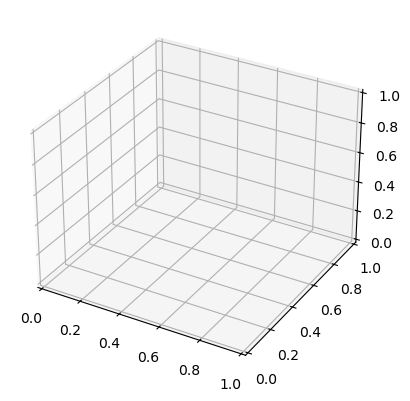

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

class Particle:
    def __init__(self, position, velocity, mass, particle_type):
        """
        Initializes a particle with position, velocity, mass, and type.
        """
        self.position = np.array(position, dtype=float)  # Position vector [x, y, z]
        self.velocity = np.array(velocity, dtype=float)  # Velocity vector [vx, vy, vz]
        self.mass = mass                                 # Mass of the particle
        self.type = particle_type                        # Particle type (e.g., "proton", "electron")
        self.energy = self.calculate_kinetic_energy()    # Initial energy calculated

    def update_position(self, dt):
        """
        Updates the particle’s position based on its velocity and a given time step dt.
        """
        self.position += self.velocity * dt

    def calculate_kinetic_energy(self):
        """
        Calculates the kinetic energy of the particle.
        KE = 0.5 * mass * velocity^2
        """
        velocity_magnitude = np.linalg.norm(self.velocity)
        kinetic_energy = 0.5 * self.mass * velocity_magnitude ** 2
        return kinetic_energy

    def detect_decay(self):
        """
        Detects if the particle should decay. This can be based on energy or random probability.
        """
        decay_probability = min(1, self.energy / 1000)  # Arbitrary threshold for demonstration
        if np.random.random() < decay_probability:
            print(f"{self.type} particle decayed!")
            return self.decay()
        return None

    def decay(self):
        """
        Decay mechanism where the particle may transform into other particles.
        Returns a list of new particles or an empty list if no decay products.
        """
        decay_products = []
        
        # For demonstration, let's assume that a proton decays into two lighter particles
        if self.type == "proton":
            decay_products.append(Particle(self.position, self.velocity / 2, self.mass / 2, "neutron"))
            decay_products.append(Particle(self.position, -self.velocity / 2, self.mass / 2, "positron"))
        
        return decay_products

    def display_info(self):
        """
        Prints particle information: type, mass, position, velocity, and energy.
        """
        print(f"Particle Type: {self.type}")
        print(f"Mass: {self.mass} kg")
        print(f"Position: {self.position}")
        print(f"Velocity: {self.velocity}")
        print(f"Kinetic Energy: {self.energy} J")

class Visualizer:
    def __init__(self, particles):
        """
        Initializes the Visualizer with a list of Particle objects.
        
        Parameters:
        particles (list): A list of Particle objects to visualize.
        """
        self.particles = particles
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.sc = None

    def update(self, num):
        """
        Update function for the animation. Updates particle positions.
        
        Parameters:
        num (int): The current frame number.
        """
        for particle in self.particles:
            particle.update_position(0.1)  # Update position with a time step of 0.1
        positions = np.array([particle.position for particle in self.particles])
        
        # Update the scatter plot instead of clearing the entire axis
        if self.sc is None:
            # Initial scatter plot
            colors = ["r" if particle.type == "proton" else "b" for particle in self.particles]
            self.sc = self.ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors)
            # Set axis labels and limits
            self.ax.set_xlabel('X Position')
            self.ax.set_ylabel('Y Position')
            self.ax.set_zlabel('Z Position')
            self.ax.set_xlim(-100, 100)
            self.ax.set_ylim(-100, 100)
            self.ax.set_zlim(-100, 100)
        else:
            # Update the data of the existing scatter plot
            self.sc._offsets3d = (positions[:, 0], positions[:, 1], positions[:, 2])

    def animate(self):
        """
        Animate the particle movements in 3D.
        """
        ani = animation.FuncAnimation(self.fig, self.update, frames=100, interval=50, blit=False)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create some particles with random positions and velocities
    particles = [
        Particle(position=[np.random.uniform(-50, 50), np.random.uniform(-50, 50), np.random.uniform(-50, 50)],
                 velocity=[np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)],
                 mass=1.0, particle_type="proton")
        for _ in range(10)
    ]

    visualizer = Visualizer(particles)
    visualizer.animate()


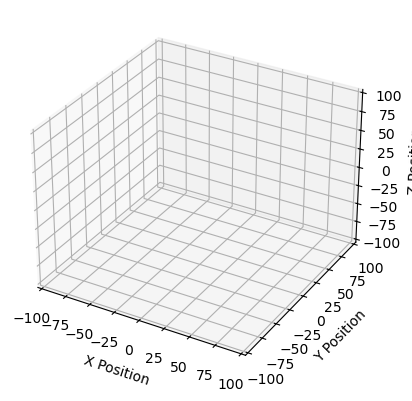

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

class Particle:
    def __init__(self, position, velocity, mass, particle_type):
        """
        Initializes a particle with position, velocity, mass, and type.
        """
        self.position = np.array(position, dtype=float)  # Position vector [x, y, z]
        self.velocity = np.array(velocity, dtype=float)  # Velocity vector [vx, vy, vz]
        self.mass = mass                                 # Mass of the particle
        self.type = particle_type                        # Particle type (e.g., "proton", "electron")
        self.energy = self.calculate_kinetic_energy()    # Initial energy calculated

    def update_position(self, dt):
        """
        Updates the particle’s position based on its velocity and a given time step dt.
        """
        self.position += self.velocity * dt

    def calculate_kinetic_energy(self):
        """
        Calculates the kinetic energy of the particle.
        KE = 0.5 * mass * velocity^2
        """
        velocity_magnitude = np.linalg.norm(self.velocity)
        kinetic_energy = 0.5 * self.mass * velocity_magnitude ** 2
        return kinetic_energy

    def detect_decay(self):
        """
        Detects if the particle should decay. This can be based on energy or random probability.
        """
        decay_probability = min(1, self.energy / 1000)  # Arbitrary threshold for demonstration
        if np.random.random() < decay_probability:
            print(f"{self.type} particle decayed!")
            return self.decay()
        return None

    def decay(self):
        """
        Decay mechanism where the particle may transform into other particles.
        Returns a list of new particles or an empty list if no decay products.
        """
        decay_products = []
        
        # For demonstration, let's assume that a proton decays into two lighter particles
        if self.type == "proton":
            decay_products.append(Particle(self.position, self.velocity / 2, self.mass / 2, "neutron"))
            decay_products.append(Particle(self.position, -self.velocity / 2, self.mass / 2, "positron"))
        
        return decay_products

    def display_info(self):
        """
        Prints particle information: type, mass, position, velocity, and energy.
        """
        print(f"Particle Type: {self.type}")
        print(f"Mass: {self.mass} kg")
        print(f"Position: {self.position}")
        print(f"Velocity: {self.velocity}")
        print(f"Kinetic Energy: {self.energy} J")

class Visualizer:
    def __init__(self, particles):
        """
        Initializes the Visualizer with a list of Particle objects.
        
        Parameters:
        particles (list): A list of Particle objects to visualize.
        """
        self.particles = particles
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.sc = None

        # Set axis labels and limits
        self.ax.set_xlabel('X Position')
        self.ax.set_ylabel('Y Position')
        self.ax.set_zlabel('Z Position')
        self.ax.set_xlim(-100, 100)
        self.ax.set_ylim(-100, 100)
        self.ax.set_zlim(-100, 100)

    def update(self, num):
        """
        Update function for the animation. Updates particle positions.
        
        Parameters:
        num (int): The current frame number.
        """
        for particle in self.particles:
            particle.update_position(0.1)  # Update position with a time step of 0.1
        positions = np.array([particle.position for particle in self.particles])
        
        # Update the scatter plot instead of clearing the entire axis
        if self.sc is None:
            # Initial scatter plot with dummy data
            colors = ["r" if particle.type == "proton" else "b" for particle in self.particles]
            self.sc = self.ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors)
        else:
            # Update the data of the existing scatter plot
            self.sc._offsets3d = (positions[:, 0], positions[:, 1], positions[:, 2])

    def animate(self):
        """
        Animate the particle movements in 3D.
        """
        ani = animation.FuncAnimation(self.fig, self.update, frames=100, interval=50, blit=False)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create some particles with random positions and velocities
    particles = [
        Particle(position=[np.random.uniform(-50, 50), np.random.uniform(-50, 50), np.random.uniform(-50, 50)],
                 velocity=[np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)],
                 mass=1.0, particle_type="proton")
        for _ in range(10)
    ]

    visualizer = Visualizer(particles)
    visualizer.animate()


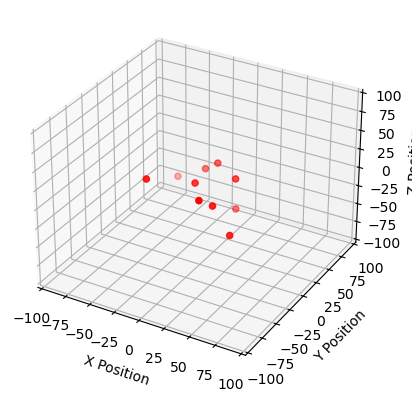

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

class Particle:
    def __init__(self, position, velocity, mass, particle_type):
        """
        Initializes a particle with position, velocity, mass, and type.
        """
        self.position = np.array(position, dtype=float)  # Position vector [x, y, z]
        self.velocity = np.array(velocity, dtype=float)  # Velocity vector [vx, vy, vz]
        self.mass = mass                                 # Mass of the particle
        self.type = particle_type                        # Particle type (e.g., "proton", "electron")
        self.energy = self.calculate_kinetic_energy()    # Initial energy calculated

    def update_position(self, dt):
        """
        Updates the particle’s position based on its velocity and a given time step dt.
        """
        self.position += self.velocity * dt

    def calculate_kinetic_energy(self):
        """
        Calculates the kinetic energy of the particle.
        KE = 0.5 * mass * velocity^2
        """
        velocity_magnitude = np.linalg.norm(self.velocity)
        kinetic_energy = 0.5 * self.mass * velocity_magnitude ** 2
        return kinetic_energy

    def detect_decay(self):
        """
        Detects if the particle should decay. This can be based on energy or random probability.
        """
        decay_probability = min(1, self.energy / 1000)  # Arbitrary threshold for demonstration
        if np.random.random() < decay_probability:
            print(f"{self.type} particle decayed!")
            return self.decay()
        return None

    def decay(self):
        """
        Decay mechanism where the particle may transform into other particles.
        Returns a list of new particles or an empty list if no decay products.
        """
        decay_products = []
        
        # For demonstration, let's assume that a proton decays into two lighter particles
        if self.type == "proton":
            decay_products.append(Particle(self.position, self.velocity / 2, self.mass / 2, "neutron"))
            decay_products.append(Particle(self.position, -self.velocity / 2, self.mass / 2, "positron"))
        
        return decay_products

    def display_info(self):
        """
        Prints particle information: type, mass, position, velocity, and energy.
        """
        print(f"Particle Type: {self.type}")
        print(f"Mass: {self.mass} kg")
        print(f"Position: {self.position}")
        print(f"Velocity: {self.velocity}")
        print(f"Kinetic Energy: {self.energy} J")

class Visualizer:
    def __init__(self, particles):
        """
        Initializes the Visualizer with a list of Particle objects.
        
        Parameters:
        particles (list): A list of Particle objects to visualize.
        """
        self.particles = particles
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection='3d')

        # Set axis labels and limits
        self.ax.set_xlabel('X Position')
        self.ax.set_ylabel('Y Position')
        self.ax.set_zlabel('Z Position')
        self.ax.set_xlim(-100, 100)
        self.ax.set_ylim(-100, 100)
        self.ax.set_zlim(-100, 100)

        # Initial scatter plot with particle positions
        positions = np.array([particle.position for particle in self.particles])
        colors = ["r" if particle.type == "proton" else "b" for particle in self.particles]
        self.sc = self.ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors)

    def update(self, num):
        """
        Update function for the animation. Updates particle positions.
        
        Parameters:
        num (int): The current frame number.
        """
        for particle in self.particles:
            particle.update_position(0.1)  # Update position with a time step of 0.1
        positions = np.array([particle.position for particle in self.particles])
        
        # Update the data of the existing scatter plot
        self.sc._offsets3d = (positions[:, 0], positions[:, 1], positions[:, 2])

    def animate(self):
        """
        Animate the particle movements in 3D.
        """
        ani = animation.FuncAnimation(self.fig, self.update, frames=100, interval=100, blit=False)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create some particles with random positions and velocities
    particles = [
        Particle(position=[np.random.uniform(-50, 50), np.random.uniform(-50, 50), np.random.uniform(-50, 50)],
                 velocity=[np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)],
                 mass=1.0, particle_type="proton")
        for _ in range(10)
    ]

    visualizer = Visualizer(particles)
    visualizer.animate()
